In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick
mpl.rc('font', family='Liberation Sans')

/tmp/ipykernel_5178/3864769643.py:4: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv('./final_outputs/w_diffs_ind_inc_deflated_hi.csv', index_col=0)[:5]
/tmp/ipykernel_5178/3864769643.py:14: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv('./final_outputs/w_diffs_ind_inc_deflated_li.csv', index_col=0)[:5]


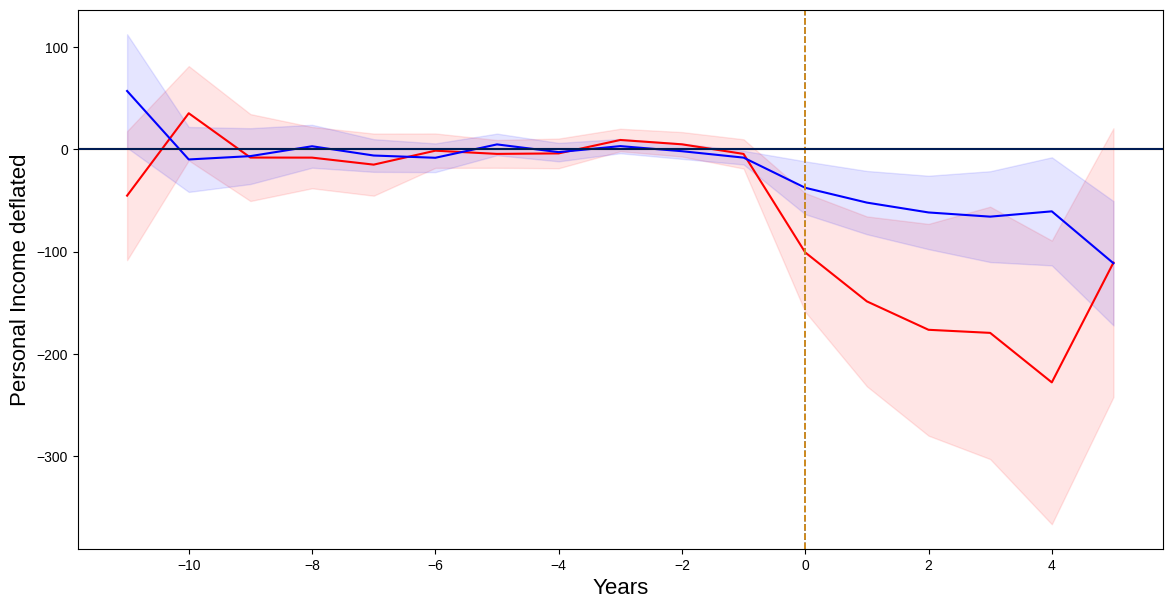

In [20]:
mpl.rc('font', family='Liberation Sans')

figure(figsize=(14, 7))
differences = pd.read_csv('./final_outputs/w_diffs_ind_inc_deflated_hi.csv', index_col=0)[:5]
ax = differences.mean(axis=1).plot(color='red')
plt.axvline(x=0, linestyle='--', color='#001c54', alpha=1, linewidth=1.25)
plt.axhline(y=0, color='#E89818', linestyle='-')
plt.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                     color='red', alpha=0.1)
differences = pd.read_csv('./final_outputs/w_diffs_ind_inc_deflated_li.csv', index_col=0)[:5]
ax = differences.mean(axis=1).plot(color='blue')
plt.axvline(x=0, linestyle='--', color='#E89818', alpha=1, linewidth=1.25)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Personal Income deflated', fontsize=16)
plt.axhline(y=0, color='#001c54', linestyle='-')
plt.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                     color='blue', alpha=0.1)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()